#### Name: Foyez Ahmed
#### ID: i23b0034s13

#### Importing Libraries

In [2]:
!pip install psycopg2


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns
import psycopg2
import pandas as pd
import psycopg2.extras
import numpy as np
import matplotlib.pyplot as plt

#### Connecting

In [4]:
#creating a class so we can use objects
class PostgresConnection(object):
    #right after calling this class __init__() function will execute first
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")
        print("\nConnected!")
    #getConnection() function will call __init__() and connect
    def getConnection(self):
            print("Connection to DB established")
            return self.connection

In [4]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

#### (i) Division wise Total Sales


#### Fetching Data from DB


In [159]:
cur = con.cursor()
stmt = """
        select s.division, s.district, t.month, t.year, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.store_dim s on s.store_key = f.store_key
        join ecom_star_schema.time_dim t on t.time_key = f.time_key
        group by CUBE(s.division, s.district, t.month, t.year)
        order by s.division
"""
cur.execute(stmt)
records = cur.fetchall()

In [139]:
records

[('Barishal', Decimal('321189.00')),
 ('Barishal', Decimal('581059.00')),
 ('Barishal', Decimal('495782.50')),
 ('Barishal', Decimal('1834234.50')),
 ('Barishal', Decimal('436204.00')),
 ('Chittagong', Decimal('420928.50')),
 ('Chittagong', Decimal('1017531.50')),
 ('Chittagong', Decimal('1438460.00')),
 ('Dhaka', Decimal('6747377.50')),
 ('Dhaka', Decimal('854983.00')),
 ('Dhaka', Decimal('715122.50')),
 ('Dhaka', Decimal('559871.50')),
 ('Dhaka', Decimal('9281487.00')),
 ('Dhaka', Decimal('404132.50')),
 ('Khulna', Decimal('608589.50')),
 ('Khulna', Decimal('2012431.00')),
 ('Khulna', Decimal('392319.00')),
 ('Khulna', Decimal('493127.50')),
 ('Khulna', Decimal('518395.00')),
 ('Mymensingh', Decimal('1640470.00')),
 ('Mymensingh', Decimal('1640470.00')),
 ('Rajshahi', Decimal('549495.50')),
 ('Rajshahi', Decimal('634255.50')),
 ('Rajshahi', Decimal('517817.50')),
 ('Rajshahi', Decimal('572943.50')),
 ('Rajshahi', Decimal('2274512.00')),
 ('Rangpur', Decimal('1935593.50')),
 ('Rangpur

#### Using Pandas to create Table

In [160]:
df_q1 = pd.DataFrame(list(records), columns=['division', 'district', 'month', 'year', 'sales'])
##here dropna() deletes the none column
df_q1 = df_q1.dropna()
df_q1

,division,district,month,year,sales
0,Barishal,Barishal,1,2016,132.0
1,Barishal,Barishal,5,2021,480.0
2,Barishal,Pirojpur,6,2015,482.0
3,Barishal,Jhalokathi,10,2019,3894.0
4,Barishal,Barishal,3,2017,1786.0
...,...,...,...,...,...
3979,Sylhet,Sunamganj,3,2014,12099.0
3980,Sylhet,Sunamganj,2,2016,6368.0
3981,Sylhet,Moulvibazar,3,2019,1012.0
3982,Sylhet,Sunamganj,5,2018,18022.50


#### Changing the DataType

In [9]:
def changetype(x):
    x['sales'] = x['sales'].astype('float64')
    #Alternatively 
    # x['sales'] = pd.to_numeric(x['sales'])

In [161]:
changetype(df_q1)

#### Plotting in a pychart

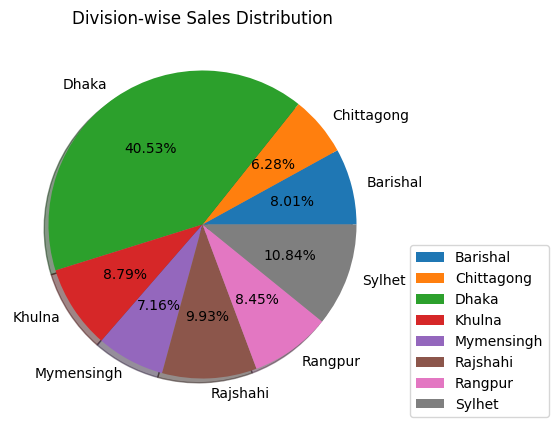

In [162]:
# Group the data by division and calculate the total sales for each division
division_sales = df_q1.groupby('division')['sales'].sum()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(division_sales, labels=division_sales.index, autopct='%1.2f%%', shadow = "True")
plt.legend(loc = (1.04, 0))
plt.title('Division-wise Sales Distribution')

# Show the pie chart
plt.show()


#### Plotting a Bar chart

Text(0, 0.5, 'Sales Per Division')

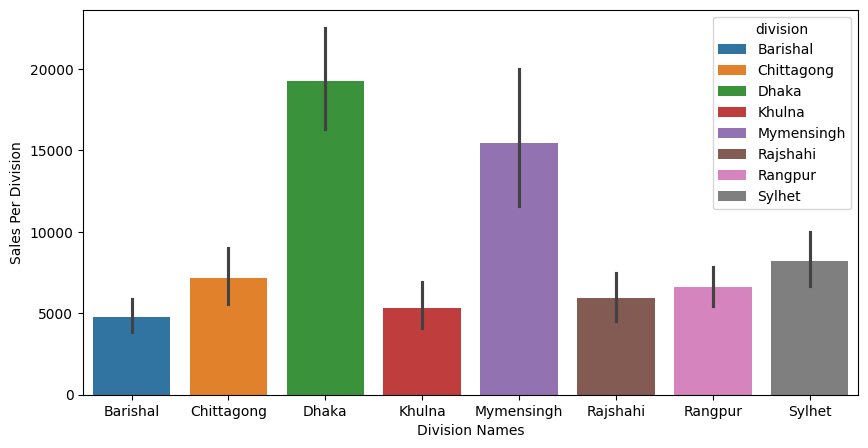

In [163]:
plt.figure(figsize=[10,5])
sns.barplot(x = df_q1['division'], y = df_q1['sales'], hue = df_q1['division'], legend=True)

#Labelling the axes
plt.xlabel('Division Names')
plt.ylabel('Sales Per Division')

#### (ii) Year Wise Total Sales

#### Fetching data from DB

In [5]:
cur = con.cursor()
stmt = """
        select s.division, s.district, t.month, t.year, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.store_dim s on s.store_key = f.store_key
        join ecom_star_schema.time_dim t on t.time_key = f.time_key
        group by CUBE(s.division, s.district, t.month, t.year)
        order by s.division
"""
cur.execute(stmt)
records = cur.fetchall()

In [6]:
records

[('Barishal', 'Barishal', Decimal('1'), Decimal('2016'), Decimal('132.0')),
 ('Barishal', 'Barishal', Decimal('5'), Decimal('2021'), Decimal('480.0')),
 ('Barishal', 'Pirojpur', Decimal('6'), Decimal('2015'), Decimal('482.0')),
 ('Barishal', 'Jhalokathi', Decimal('10'), Decimal('2019'), Decimal('3894.0')),
 ('Barishal', 'Barishal', Decimal('3'), Decimal('2017'), Decimal('1786.0')),
 ('Barishal', 'Pirojpur', Decimal('7'), Decimal('2018'), Decimal('612.0')),
 ('Barishal',
  'Jhalokathi',
  Decimal('6'),
  Decimal('2016'),
  Decimal('17003.50')),
 ('Barishal', 'Pirojpur', Decimal('10'), Decimal('2020'), Decimal('2662.0')),
 ('Barishal', 'Barishal', Decimal('11'), Decimal('2015'), Decimal('1702.0')),
 ('Barishal', 'Bhola', Decimal('12'), Decimal('2017'), Decimal('1746.0')),
 ('Barishal', 'Jhalokathi', Decimal('5'), Decimal('2022'), Decimal('1360.0')),
 ('Barishal', 'Pirojpur', Decimal('11'), Decimal('2015'), Decimal('480.0')),
 ('Barishal', 'Pirojpur', Decimal('2'), Decimal('2016'), Decima

#### Using Pandas to create Table

In [7]:
df_q1 = pd.DataFrame(list(records), columns=['division', 'district', 'month', 'year', 'sales'])
##here dropna() deletes the none column
df_q1 = df_q1.dropna()
df_q1

,division,district,month,year,sales
0,Barishal,Barishal,1,2016,132.0
1,Barishal,Barishal,5,2021,480.0
2,Barishal,Pirojpur,6,2015,482.0
3,Barishal,Jhalokathi,10,2019,3894.0
4,Barishal,Barishal,3,2017,1786.0
...,...,...,...,...,...
3979,Sylhet,Sunamganj,3,2014,12099.0
3980,Sylhet,Sunamganj,2,2016,6368.0
3981,Sylhet,Moulvibazar,3,2019,1012.0
3982,Sylhet,Sunamganj,5,2018,18022.50


#### Changing data type


In [11]:
#already built the function, no need to call the whole thing again!
changetype(df_q1)

#### Plotting in Pie Chart

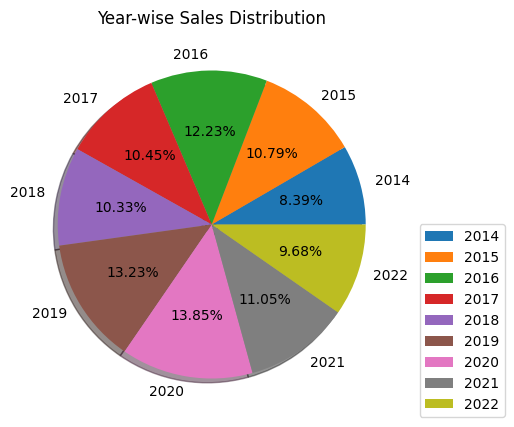

In [13]:
# Group the data by division and calculate the total sales for each division
year_sales = df_q1.groupby('year')['sales'].sum()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(year_sales, labels=year_sales.index, autopct='%1.2f%%', shadow = "True")
plt.legend(loc = (1.04, 0))
plt.title('Year-wise Sales Distribution')

# Show the pie chart
plt.show()


#### Plotting Bar chart

Text(0, 0.5, 'Sales Per Year')

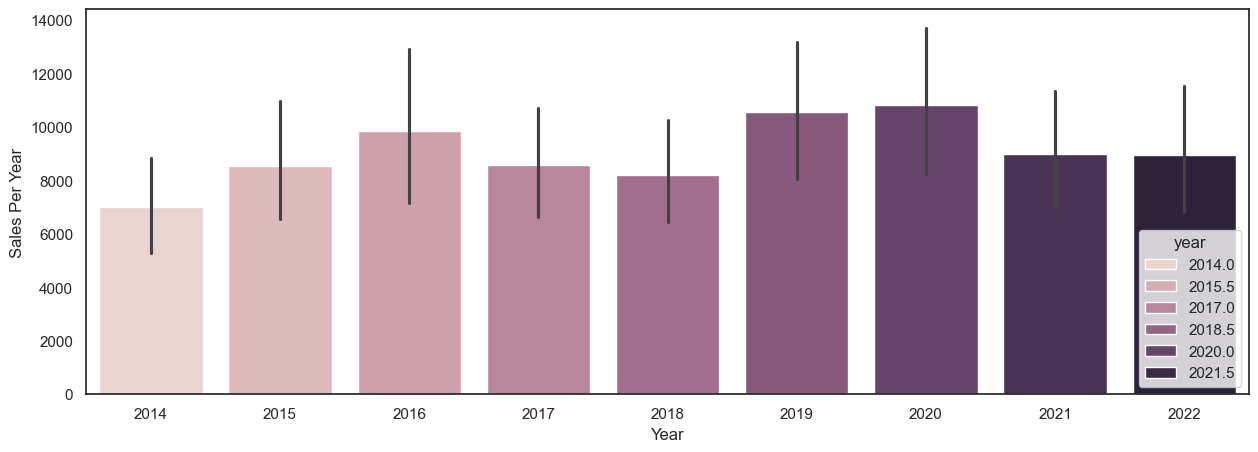

In [27]:
plt.figure(figsize=[15,5])
sns.set(style='white')
sns.barplot(x = df_q1['year'], y = df_q1['sales'], hue = df_q1['year'], legend=True)

#Labelling the axes
plt.xlabel('Year')
plt.ylabel('Sales Per Year')

#### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

#### (i) Customer Wise Sales

#### Fetching Data from DB


In [40]:
cur = con.cursor()
stmt = """
        select c.customer_key, t.bank_name, t.trans_type, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.customer_dim c on c.customer_key = f.customer_key
        join ecom_star_schema.trans_dim t on t.payment_key = f.payment_key
        group by CUBE(c.customer_key, t.trans_type, t.bank_name)
        LIMIT 100
"""
cur.execute(stmt)
records = cur.fetchall()

In [33]:
records

[(4, 'BRAC Bank Limited', 'card', Decimal('900.0')),
 (2, 'Midland Bank Limited', 'card', Decimal('676.0')),
 (2, 'Padma Bank Limited', 'card', Decimal('544.0')),
 (8, None, 'card', Decimal('2120.0')),
 (8, None, None, Decimal('2120.0')),
 (2, 'Modhumoti Bank Limited', 'card', Decimal('720.0')),
 (2, None, 'card', Decimal('720.0')),
 (2, None, None, Decimal('720.0')),
 (2, 'AB Bank Limited', 'card', Decimal('1020.0')),
 (2, 'BRAC Bank Limited', 'card', Decimal('58.0')),
 (2, 'Jamuna Bank Limited', 'card', Decimal('952.0')),
 (2, 'Modhumoti Bank Limited', 'card', Decimal('264.0')),
 (2,
  'South Bangla Agriculture and Commerce Bank Limited',
  'card',
  Decimal('512.0')),
 (10, None, 'card', Decimal('2806.0')),
 (2, 'Nagad', 'mobile', Decimal('4650.0')),
 (2, None, 'mobile', Decimal('4650.0')),
 (12, None, None, Decimal('7456.0')),
 (2, 'City Bank Limited', 'card', Decimal('544.0')),
 (2, 'Jamuna Bank Limited', 'card', Decimal('37184.0')),
 (2, 'Midland Bank Limited', 'card', Decimal('6

#### Using Pandas to create Table

In [45]:
df_q2 = pd.DataFrame(list(records), columns=['customers', 'bank_name', 'type', 'total_sales'])
##here dropna() deletes the none column
df_q2 = df_q2.dropna()
df_q2

,customers,bank_name,type,total_sales
0,C000001,BRAC Bank Limited,card,900.0
1,C000001,Midland Bank Limited,card,676.0
2,C000001,Padma Bank Limited,card,544.0
5,C000002,Modhumoti Bank Limited,card,720.0
8,C000003,AB Bank Limited,card,1020.0
...,...,...,...,...
92,C000015,Eastern Bank Limited,card,5544.0
93,C000015,Midland Bank Limited,card,840.0
94,C000015,NRB Bank Limited,card,2870.0
95,C000015,NRB Global Bank Ltd,card,36.0


#### Plotting Bar Chart

Text(0, 0.5, 'Sales Per Year')

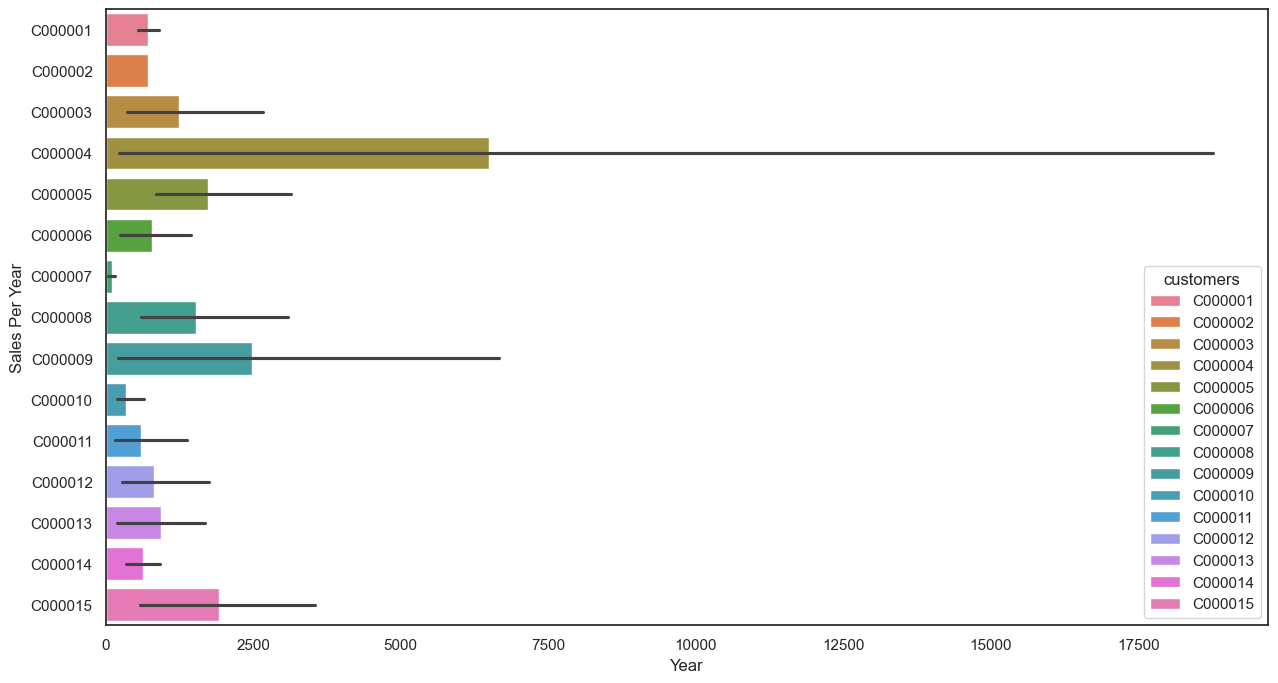

In [44]:
plt.figure(figsize=[15,8])
sns.set(style='white')
sns.barplot(x = df_q2['total_sales'], y = df_q2['customers'], hue = df_q2['customers'], legend=True)

#Labelling the axes
plt.xlabel('Year')
plt.ylabel('Sales Per Year')

#### (ii) Transaction(cash) wise sales

#### Fetching Data from DB

In [50]:
cur = con.cursor()
stmt = """
        select c.customer_key, t.bank_name, t.trans_type, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.customer_dim c on c.customer_key = f.customer_key
        join ecom_star_schema.trans_dim t on t.payment_key = f.payment_key
        group by CUBE(c.customer_key, t.trans_type, t.bank_name)
"""
cur.execute(stmt)
records = cur.fetchall()

#### Using Pandas to create Table

In [51]:
df_q2 = pd.DataFrame(list(records), columns=['customers', 'bank_name', 'type', 'total_sales'])
##here dropna() deletes the none column
df_q2 = df_q2.dropna()
df_q2

,customers,bank_name,type,total_sales
0,C000001,BRAC Bank Limited,card,900.0
1,C000001,Midland Bank Limited,card,676.0
2,C000001,Padma Bank Limited,card,544.0
5,C000002,Modhumoti Bank Limited,card,720.0
8,C000003,AB Bank Limited,card,1020.0
...,...,...,...,...
14249,C002000,Midland Bank Limited,card,850.0
14250,C002000,Modhumoti Bank Limited,card,270.0
14251,C002000,National Bank Limited,card,748.0
14252,C002000,Southeast Bank Limited,card,2288.0


#### Plotting Pie Chart

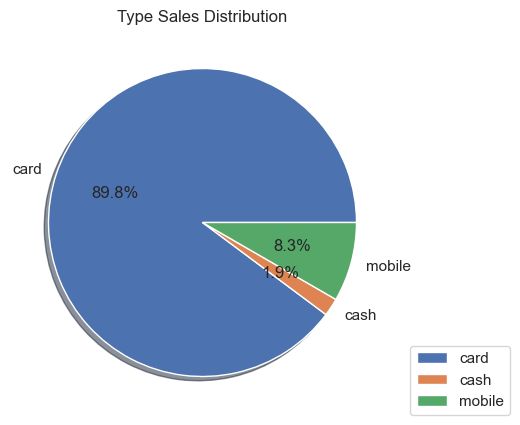

In [52]:
# Group the data by division and calculate the total sales for each division
type_sales = df_q2.groupby('type')['total_sales'].sum()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(type_sales, labels=type_sales.index, autopct='%1.1f%%', shadow = "True")
plt.legend(loc = (1.04, 0))
plt.title('Type Sales Distribution')

# Show the pie chart
plt.show()


#### Q3: Total sales in Barishal compared with other divisions total sales

#### Fetching data from DB

In [53]:
cur = con.cursor()
stmt = """
        select s.division, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.store_dim s on s.store_key = f.store_key
        group by CUBE(s.division)
"""
cur.execute(stmt)
records = cur.fetchall()

In [54]:
records

[(None, Decimal('22900665.50')),
 ('Chittagong', Decimal('1438460.00')),
 ('Sylhet', Decimal('2483477.50')),
 ('Rangpur', Decimal('1935593.50')),
 ('Barishal', Decimal('1834234.50')),
 ('Rajshahi', Decimal('2274512.00')),
 ('Khulna', Decimal('2012431.00')),
 ('Dhaka', Decimal('9281487.00')),
 ('Mymensingh', Decimal('1640470.00'))]

#### Using Pandas to create a table

In [55]:
df_q3 = pd.DataFrame(list(records), columns=['division', 'total_sales'])
##here dropna() deletes the none column
df_q3 = df_q3.dropna()
df_q3

,division,total_sales
1,Chittagong,1438460.00
2,Sylhet,2483477.50
3,Rangpur,1935593.50
4,Barishal,1834234.50
5,Rajshahi,2274512.00
6,Khulna,2012431.00
7,Dhaka,9281487.00
8,Mymensingh,1640470.00


#### Plotting a pie chart

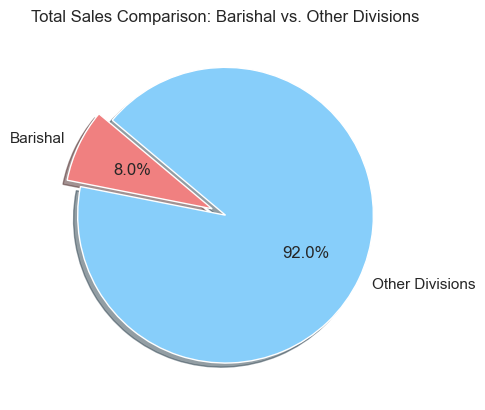

In [62]:
# Filter data to focus on Barishal and other divisions
barishal_sales = df_q3[df_q3['division'] == 'Barishal']['total_sales'].values[0]
other_divisions_sales = df_q3[df_q3['division'] != 'Barishal']['total_sales'].sum()

# Create a pie chart to visualize the sales comparison
labels = ['Barishal', 'Other Divisions']
sizes = [barishal_sales, other_divisions_sales]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the 1st slice (Barishal)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Sales Comparison: Barishal vs. Other Divisions')

plt.show()

#### Q4: Total Sales in 2015

#### Fetching Data from DB

#### Connecting 

In [73]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Fetching data from DB

In [82]:
cur = con.cursor()
stmt = """
        select t.year, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.time_dim t on t.time_key = f.time_key
        where t.year = '2015'
        group by CUBE(t.year)
        order by (t.year)
"""
cur.execute(stmt)
records = cur.fetchall()

In [76]:
records

[(Decimal('2015'), Decimal('2471521.00')), (None, Decimal('2471521.00'))]

#### Using Pandas to create a Table

In [85]:
df_q4 = pd.DataFrame(records, columns=['year', 'total_sales'])
##here dropna() deletes the none column
df_q4 = df_q4.dropna()
df_q4

,year,total_sales
0,2015,2471521.00


<Axes: xlabel='year', ylabel='total_sales'>

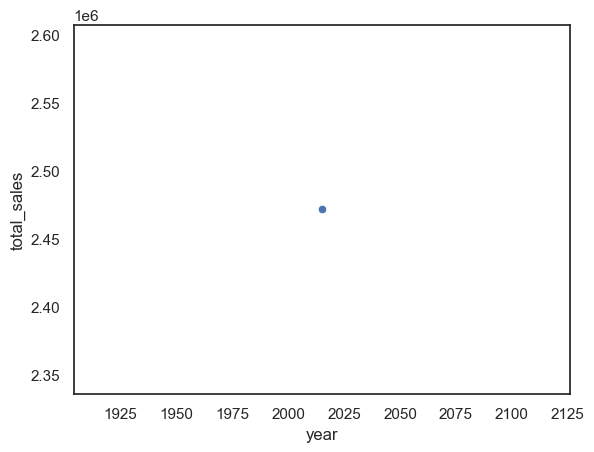

In [90]:
sns.scatterplot(df_q4, x = 'year', y = 'total_sales')

#### Q5: Total sales of Dhaka in 2015

#### Connecting

In [94]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Fetching data from DB

In [95]:
cur = con.cursor()
stmt = """
        select s.division, t.year, SUM(f.total_price)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.time_dim t on t.time_key = f.time_key
        join ecom_star_schema.store_dim s on s.store_key = f.store_key
        where t.year = '2015' and s.division = 'Dhaka'
        group by CUBE(s.division, t.year)
"""
cur.execute(stmt)
records = cur.fetchall()

In [96]:
records

[('Dhaka', Decimal('2015'), Decimal('1066257.50')),
 ('Dhaka', None, Decimal('1066257.50')),
 (None, None, Decimal('1066257.50')),
 (None, Decimal('2015'), Decimal('1066257.50'))]

#### Using Pandas to create a Table

In [97]:
df_q5 = pd.DataFrame(records, columns=['division', 'year', 'total_sales'])
##here dropna() deletes the none column
df_q5 = df_q5.dropna()
df_q5

,division,year,total_sales
0,Dhaka,2015,1066257.50


#### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

#### Connecting

In [98]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Fetching Data from DB

In [131]:
cur = con.cursor()
stmt = """
        select s.store_key, i.item_name, SUM(f.quantity)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.store_dim s on s.store_key = f.store_key
        join ecom_star_schema.item_dim i on i.item_key = f.item_key
        group by ROLLUP(s.store_key, i.item_name)
        order by s.store_key, SUM(f.quantity) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [108]:
records

[('S0001', None, Decimal('20456')),
 ('S0001', 'Sweet N Low Sweetener', Decimal('2820')),
 ('S0001', 'Sweet N Low Sweetener', Decimal('2820')),
 ('S0001', None, Decimal('2820')),
 ('S0001', 'Foam Coffee Cups - 16 ounce', Decimal('1786')),
 ('S0001', 'Hefty Supreme Foam Plates 9 inch', Decimal('1282')),
 ('S0001', 'Truvia Natural Sweetener', Decimal('1030')),
 ('S0001', 'Foam Coffee Cups - 12 ounce', Decimal('1020')),
 ('S0001', None, Decimal('902')),
 ('S0001', 'Foam Coffee Cups - 12 ounce', Decimal('902')),
 ('S0001', 'Paper Plates 7 inch  Ultra Strong', Decimal('876')),
 ('S0001', 'Foam Coffee Cups - 16 ounce', Decimal('842')),
 ('S0001', None, Decimal('842')),
 ('S0001', 'Foam Coffee Cups - 16 ounce', Decimal('828')),
 ('S0001', None, Decimal('828')),
 ('S0001', 'Hefty Supreme Foam Bowls 12oz', Decimal('770')),
 ('S0001', 'Truvia Natural Sweetener', Decimal('746')),
 ('S0001', None, Decimal('746')),
 ('S0001', 'Sugar in the Raw Packets', Decimal('646')),
 ('S0001', 'Sugar in the Raw

#### Using Pandas to create a Table

In [132]:
df_q6 = pd.DataFrame(records, columns=['store', 'item', 'quantity'])
##here dropna() deletes the none column
df_q6 = df_q6.dropna()
df_q6

,store,item,quantity
1,S0001,Sweet N Low Sweetener,2820
2,S0001,Foam Coffee Cups - 16 ounce,1786
3,S0001,Hefty Supreme Foam Plates 9 inch,1282
4,S0001,Truvia Natural Sweetener,1030
5,S0001,Foam Coffee Cups - 12 ounce,1020
...,...,...,...
6694,S0044,Pop Chips Variety bags,2
6695,S0044,Sobe Zero Lifewater Variety 20 oz,2
6696,S0044,Fresca Black Cherry - 12 oz cans,2
6697,S0044,Waterloo Sparkling Watermelon 12oz,2


#### Choosing the first 3 items of each store

In [140]:
df_q6 = df_q6.groupby('store').head(3)
df_q6

,store,item,quantity
1,S0001,Sweet N Low Sweetener,2820.0
2,S0001,Foam Coffee Cups - 16 ounce,1786.0
3,S0001,Hefty Supreme Foam Plates 9 inch,1282.0
150,S0002,Stirrers Coffee Stirs 7inch,8048.0
151,S0002,Napkins Square Lunch,3782.0
...,...,...,...
6400,S0043,Sweet N Low Sweetener,3956.0
6401,S0043,Equal Sweetener,2262.0
6550,S0044,Splenda Sweetener,2206.0
6551,S0044,Njoy Creamer Packs,1416.0


#### Plotting a Scatter Plot

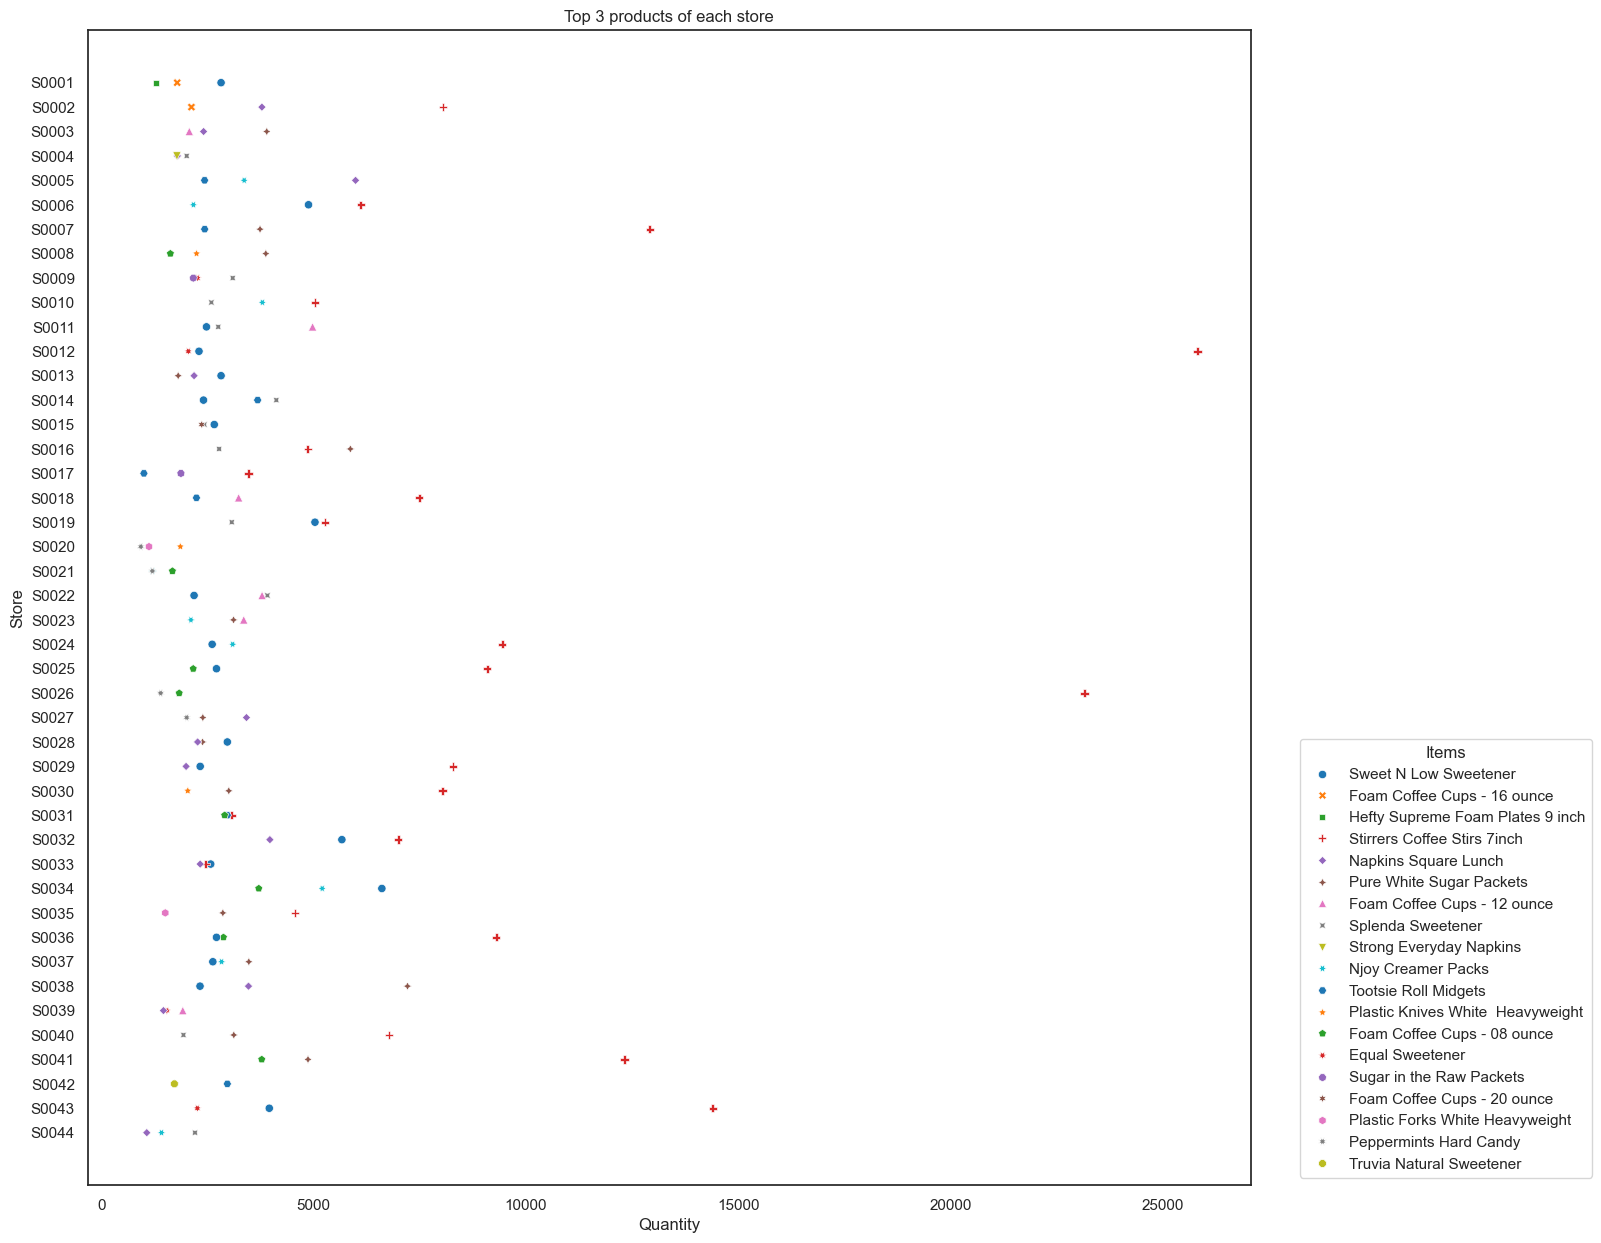

In [191]:
plt.figure(figsize = (15,15))
sns.scatterplot(df_q6, x = 'quantity', y = 'store', hue = 'item', palette = 'tab10', style = 'item')

plt.title('Top 3 products of each store')
plt.xlabel('Quantity')
plt.ylabel('Store')
legend = plt.legend(title='Items', loc='lower right', bbox_to_anchor=(1.3, 0))

#### Q7: What products have been sold through card or mobile since X days?

    input: X = 400 days [use 400 or more days]

    output: [item1, item2, item3, ...........]

#### Connection

In [16]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Input

In [10]:
x = input("Enter Days: ")

Enter Days:  400


In [17]:
cur = con.cursor()
s1 = """
        select i.item_name, t.date, tr.trans_type
        from ecom_star_schema.fact_table f
        join ecom_star_schema.time_dim t on t.time_key = f.time_key
        join ecom_star_schema.item_dim i on i.item_key = f.item_key
        join ecom_star_schema.trans_dim tr on tr.payment_key = f.payment_key
        where t.date > (CURRENT_DATE - INTERVAL '""" 
s2 = str(x) + " days') AND tr.trans_type = 'card'"
stmt = s1 + s2
cur.execute(stmt)
records = cur.fetchall()

In [18]:
df_q7 = pd.DataFrame(list(records), columns=['Item_name', 'Dates', 'Trans_type'])
df_q7 = df_q7.dropna()
df_q7

,Item_name,Dates,Trans_type
0,Belvita Hard Biscuits Blueberry,2022-10-23,card
1,Vita Coconut Water 10oz,2022-10-23,card
2,Belvita Hard Biscuits Blueberry,2022-10-23,card
3,Vita Coconut Water 10oz,2022-10-23,card
4,Goldfish Pepperidge Farm Cheddar 1.5oz,2022-11-12,card
...,...,...,...
159,AquaFina Purified Drinking Water 16oz,2022-10-19,card
160,Mountain Dew - 12 oz cans,2022-10-23,card
161,Coffee-Mate Original Flavor Cold,2022-11-11,card
162,AquaFina Purified Drinking Water 16oz,2022-10-19,card


#### Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

#### Connection

In [19]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [20]:
cur = con.cursor()
stmt = """
        select t.quarter, i.item_name, SUM(f.quantity)
        from ecom_star_schema.fact_table f
        join ecom_star_schema.time_dim t on t.time_key = f.time_key
        join ecom_star_schema.item_dim i on i.item_key = f.item_key
        group by CUBE(t.quarter, i.item_name, f.quantity)
        order by t.quarter, SUM(f.quantity) ASC
"""
cur.execute(stmt)
records = cur.fetchall()

In [22]:
df_q8 = pd.DataFrame(list(records), columns=['Quarter', 'Item', 'Quantity'])
df_q8 = df_q8.dropna()
df_q8

,Quarter,Item,Quantity
0,Q1,Tropicana Apple Juice 10 oz 100%,2
1,Q1,Hawaiian Punch - 12 oz cans,2
2,Q1,Altoids Small Packs Variety,2
3,Q1,Bounty Paper Towels Select a Size,2
4,Q1,San Pelligrino 16oz Plastic,2
...,...,...,...
10506,Q4,Foam Coffee Cups - 08 ounce,13716
10507,Q4,Pure White Sugar Packets,15720
10508,Q4,Napkins Square Lunch,18450
10509,Q4,Sweet N Low Sweetener,18940


#### Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [24]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [25]:
cur = con.cursor()
select_stmt = """  
SELECT i.item_name, c.division,  SUM(f.quantity)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.item_dim i on i.item_key = f.item_key
JOIN ecom_star_schema.store_dim c on c.store_key = f.store_key
GROUP BY CUBE(c.division, i.item_name, f.quantity)
order by i.item_name, SUM(f.quantity) ASC
"""
cur.execute(select_stmt)
records = cur.fetchall()

In [27]:
df_q9 = pd.DataFrame(records, columns = ['Division','Item_name' ,'Quantity'])
df_q9 = df_q9.dropna()
df_q9

,Division,Item_name,Quantity
0,100% Juice Box Variety 6.75 oz,Rajshahi,4
1,100% Juice Box Variety 6.75 oz,Dhaka,4
3,100% Juice Box Variety 6.75 oz,Rajshahi,10
4,100% Juice Box Variety 6.75 oz,Mymensingh,10
5,100% Juice Box Variety 6.75 oz,Rajshahi,12
...,...,...,...
16597,Zoo Animal Cookies/Crackers,Khulna,194
16599,Zoo Animal Cookies/Crackers,Rangpur,222
16600,Zoo Animal Cookies/Crackers,Chittagong,232
16601,Zoo Animal Cookies/Crackers,Mymensingh,294


#### Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

     s1-> M2 -> avg_sales

#### Connection

In [29]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [30]:
cur = con.cursor()
select_stmt = """  
SELECT  c.store_key,i.month,  AVG(f.quantity)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim i on i.time_key = f.time_key
JOIN ecom_star_schema.store_dim c on c.store_key = f.store_key
GROUP BY CUBE(c.store_key, i.month, f.quantity)
order by i.month,c.store_key, AVG(f.quantity) ASC

"""
cur.execute(select_stmt)
records = cur.fetchall()

In [31]:
df_q10 = pd.DataFrame(records, columns = ['Store' ,'Month','Quantity'])
df_q10=df_q10.dropna()
df_q10

,Store,Month,Quantity
0,S0001,1,2.0000000000000000
1,S0001,1,8.0000000000000000
2,S0001,1,9.0000000000000000
3,S0001,1,13.0000000000000000
4,S0001,1,18.0000000000000000
...,...,...,...
10434,S0044,12,23.0000000000000000
10435,S0044,12,32.0000000000000000
10436,S0044,12,40.0000000000000000
10437,S0044,12,70.8421052631578947


#### 1. store and time dimensional financial analytics.

#### Which store has the most sales in the year 2022

In [106]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [111]:
cur = con.cursor()
select_stmt = """  
SELECT  c.store_key, i.year, MAX(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim i on i.time_key = f.time_key
JOIN ecom_star_schema.store_dim c on c.store_key = f.store_key
WHERE i.year = '2022'
GROUP BY ROLLUP(c.store_key, i.year, f.total_price)
order by c.store_key, i.year, f.total_price ASC
"""
cur.execute(select_stmt)
records = cur.fetchall()

In [112]:
df = pd.DataFrame(records, columns = ['Store','Year','Sales'])
df = df.dropna()
df

,Store,Year,Sales
0,S0001,2022,23.0
1,S0001,2022,32.0
2,S0001,2022,48.0
3,S0001,2022,64.0
4,S0001,2022,84.0
...,...,...,...
957,S0044,2022,465.0
958,S0044,2022,588.0
959,S0044,2022,1200.0
960,S0044,2022,1911.0


Text(0.5, 1.0, 'Max Sales of Stores in the Yearr 2022')

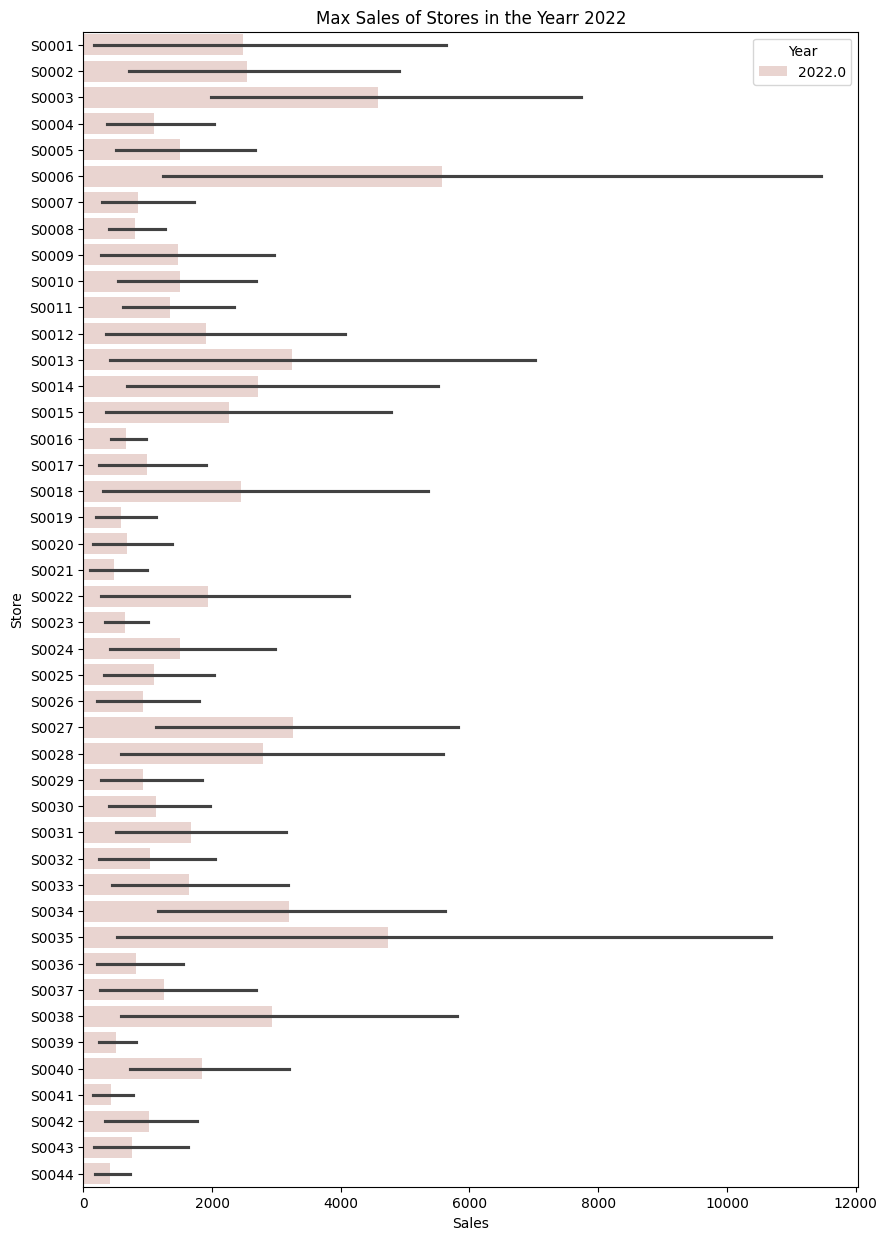

In [114]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Store'], x= df['Sales'], hue = df['Year'], legend =True)
plt.xlabel("Sales")
plt.ylabel("Store")
plt.title("Max Sales of Stores in the Yearr 2022")

#### What is the most sales of stores in Q

In [116]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [117]:
cur = con.cursor()
select_stmt = """  
SELECT  c.store_key, i.quarter, MAX(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim i on i.time_key = f.time_key
JOIN ecom_star_schema.store_dim c on c.store_key = f.store_key
WHERE i.year = '2022' AND i.quarter = 'Q4'
GROUP BY ROLLUP(c.store_key,i.year, i.quarter, f.total_price)
order by c.store_key, i.year, f.total_price ASC
"""
cur.execute(select_stmt)
records = cur.fetchall()

In [118]:
df = pd.DataFrame(records, columns = ['Store','Quarter','Sales'])
df = df.dropna()
df

,Store,Quarter,Sales
0,S0001,Q4,84.0
1,S0001,Q4,84.0
4,S0002,Q4,60.0
5,S0002,Q4,1170.0
6,S0002,Q4,17895.0
...,...,...,...
253,S0043,Q4,595.0
256,S0044,Q4,154.0
257,S0044,Q4,190.0
258,S0044,Q4,1911.0


Text(0.5, 1.0, 'Max sales per store in Q4 of 2022')

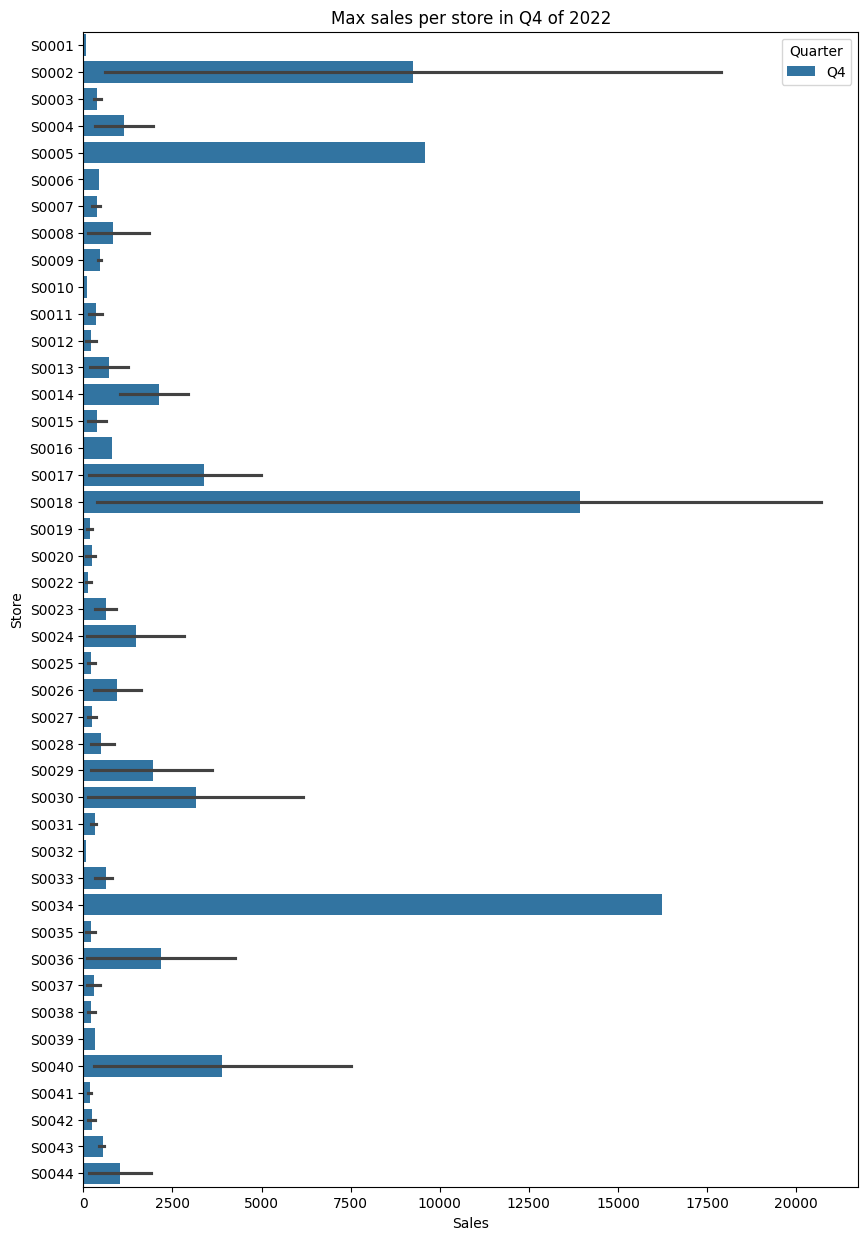

In [119]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Store'], x= df['Sales'], hue = df['Quarter'], legend =True)
plt.xlabel("Sales")
plt.ylabel("Store")
plt.title("Max sales per store in Q4 of 2022")

#### 2. customer and time dimensional financial analytics.

#### What is the total purchase by customer in Q4 of 2022

In [51]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [52]:
cur = con.cursor()
stmt = """  
SELECT  c.name, i.quarter, MAX(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim i on i.time_key = f.time_key
JOIN ecom_star_schema.customer_dim c on c.customer_key = f.customer_key
WHERE i.year = '2022' AND i.quarter = 'Q4'
GROUP BY ROLLUP(c.name, i.year, i.quarter)
order by SUM(f.total_price) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [53]:
df = pd.DataFrame(records, columns = ['Name','Quarter','Sales'])
df = df.dropna()
df = df.head(25)
df

,Name,Quarter,Sales
1,sapna,Q4,20706.0
5,nagina,Q4,17895.0
9,vishal,Q4,16224.0
12,suraj singh,Q4,9585.0
14,nikhil,Q4,7500.0
16,babita,Q4,6160.0
20,hina,Q4,5280.0
22,neha,Q4,5274.0
27,anuradha,Q4,4982.0
28,reena,Q4,2928.0


Text(0.5, 1.0, 'Highest Paying Customer of 2022')

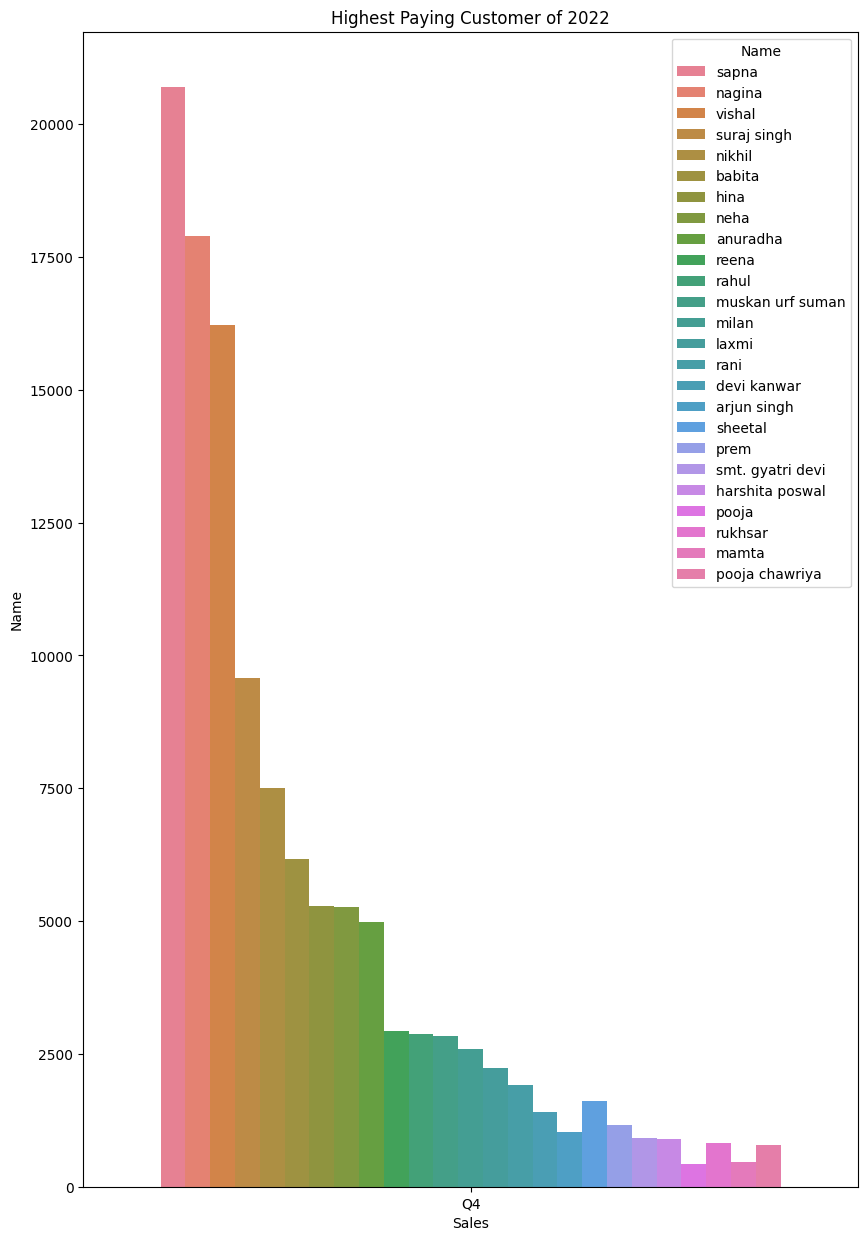

In [54]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Sales'], x= df['Quarter'], hue = df['Name'], legend =True)
plt.xlabel("Sales")
plt.ylabel("Name")
plt.title("Highest Paying Customer of 2022")

#### What is the division wise total sales in Year 2022

In [58]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [69]:
cur = con.cursor()
stmt = """  
SELECT  c.division, SUM(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim i on i.time_key = f.time_key
JOIN ecom_star_schema.customer_dim c on c.customer_key = f.customer_key
WHERE i.year = '2022' AND i.quarter = 'Q4'
GROUP BY ROLLUP(c.division)
order by SUM(f.total_price) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [71]:
df = pd.DataFrame(records, columns = ['Division','Sales'])
df = df.dropna()
df

,Division,Sales
1,Dhaka,212752.00
2,Chittagong,55072.0
3,Barishal,12438.0
4,Sylhet,6513.0


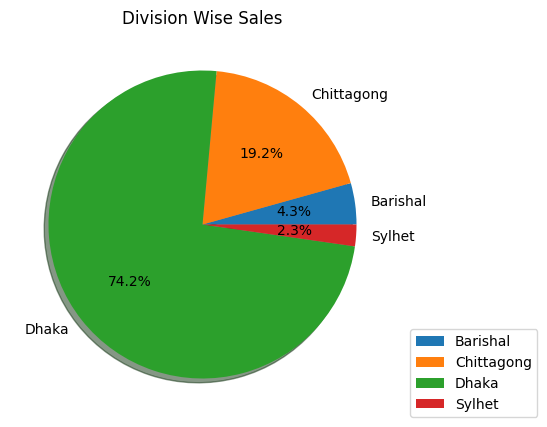

In [73]:
# Group the data by division and calculate the total sales for each division
type_sales = df.groupby('Division')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(type_sales, labels=type_sales.index, autopct='%1.1f%%', shadow = "True")
plt.legend(loc = (1.04, 0))
plt.title('Division Wise Sales')

# Show the pie chart
plt.show()


#### 3. item and time dimensional financial analytics.

#### What is the top 10 items sold in Q4 of 2022

In [89]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [90]:
cur = con.cursor()
stmt = """  
SELECT  i.item_name, t.quarter, SUM(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim t on t.time_key = f.time_key
JOIN ecom_star_schema.item_dim i on i.item_key = f.item_key
WHERE t.year = '2022' AND t.quarter = 'Q4'
GROUP BY ROLLUP(i.item_name, t.quarter)
order by SUM(f.total_price) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [94]:
df = pd.DataFrame(records, columns = ['Item',"Quarter",'Sales'])
df = df.dropna()
df = df.head(10)
df

,Item,Quarter,Sales
2,Napkins Square Lunch,Q4,54960.0
3,Stirrers Coffee Stirs 7inch,Q4,41412.0
5,Sweet N Low Sweetener,Q4,32448.0
7,Plastic Spoons White Heavyweight,Q4,15000.0
10,Honey Packets,Q4,13770.0
12,Strong Everyday Napkins,Q4,12320.0
13,Peppermints Hard Candy,Q4,10680.0
15,Truvia Natural Sweetener,Q4,10548.0
18,K Cups Daily Chef Columbian Supremo,Q4,9964.0
19,K Cups – Starbuck's Pike Place,Q4,6776.0


Text(0.5, 1.0, 'Top 10 Items Sold in Q4 of 2022')

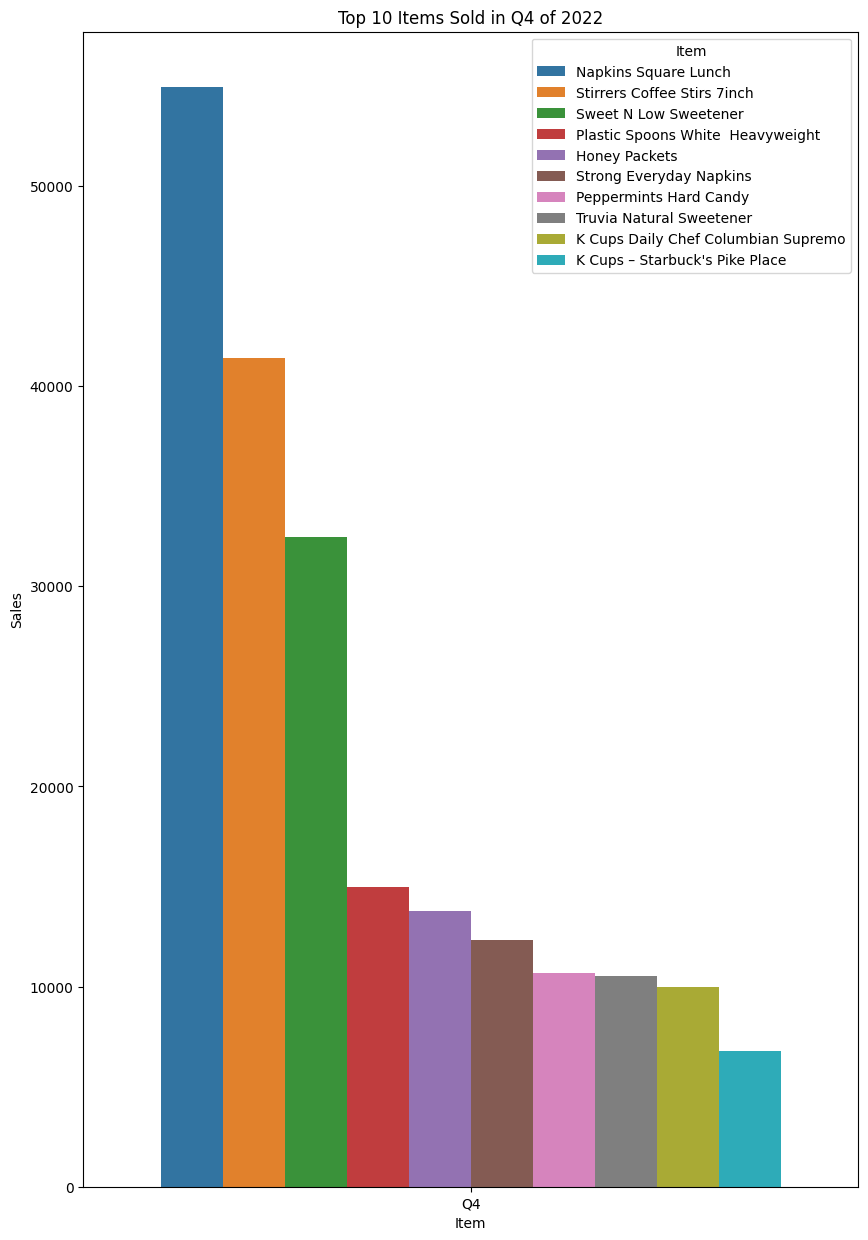

In [96]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Sales'], x= df['Quarter'], hue = df['Item'], legend =True)
plt.xlabel("Item")
plt.ylabel("Sales")
plt.title("Top 10 Items Sold in Q4 of 2022")

#### What are the best items sold in the first week of January of 2022

In [97]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [98]:
cur = con.cursor()
stmt = """  
SELECT  i.item_name, t.week, SUM(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim t on t.time_key = f.time_key
JOIN ecom_star_schema.item_dim i on i.item_key = f.item_key
WHERE t.year = '2022' AND t.month = '1' AND t.week = '1st Week'
GROUP BY ROLLUP(i.item_name, t.week)
order by SUM(f.total_price) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [99]:
df = pd.DataFrame(records, columns = ['Item',"Week",'Sales'])
df = df.dropna()
df

,Item,Week,Sales
2,Red Plastic Cups 18oz,1st Week,10816.0
4,Snyders Pretzels Minis,1st Week,1260.0
6,Famous Amos Cookies,1st Week,748.0
7,Wint O Green LifeSavers Sugar Free,1st Week,704.0
9,Gatorade Variety 20 oz,1st Week,680.0
12,Diet Dr. Pepper - 12 oz cans,1st Week,520.0
13,Pure Leaf Sweet Tea 8.5oz,1st Week,476.0
15,Propel Zero Variety 20 oz,1st Week,288.0
18,Waterloo Sparkling Blackcherry 12oz,1st Week,96.0
19,Lunchables Variety Pack Oscar Meyer,1st Week,72.0


Text(0.5, 1.0, 'Best Items sold in the 1st Week of January, 2022')

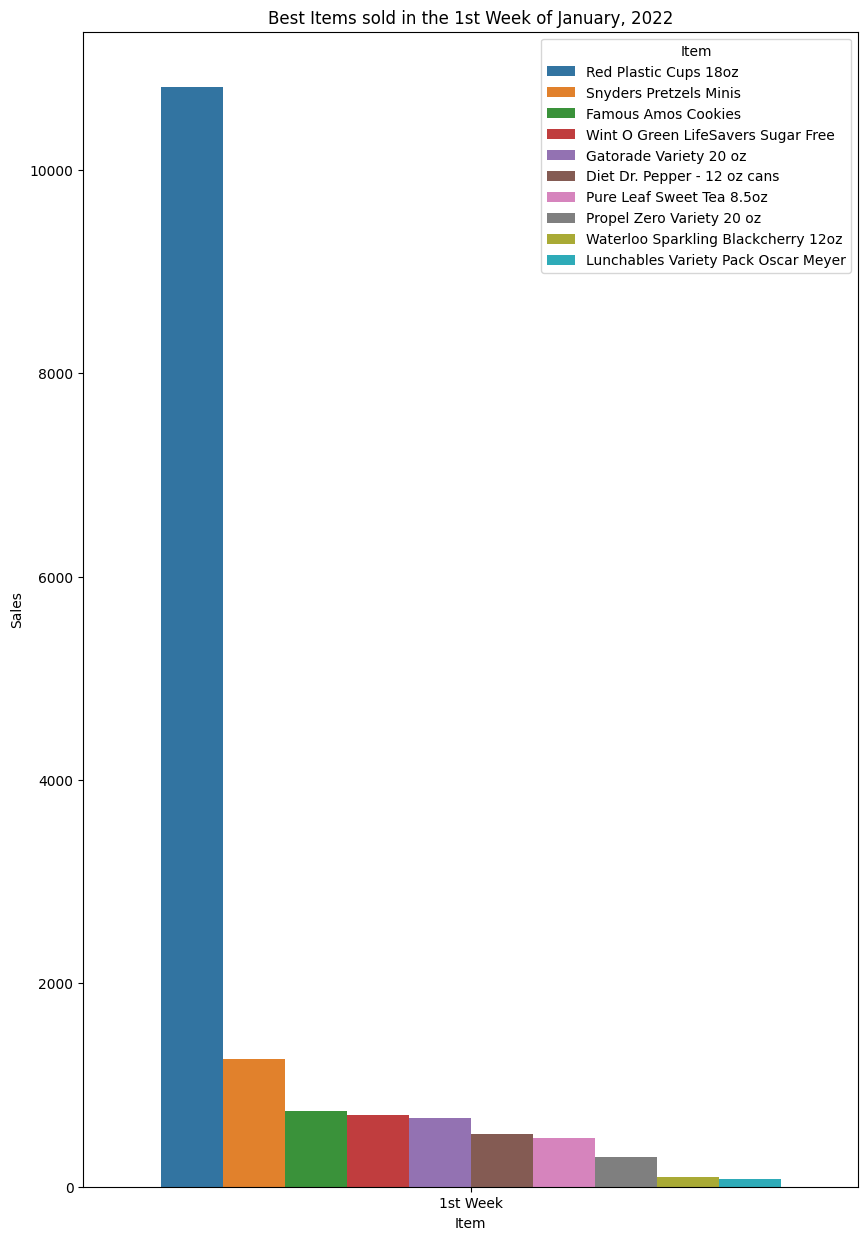

In [101]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Sales'], x= df['Week'], hue = df['Item'], legend =True)
plt.xlabel("Item")
plt.ylabel("Sales")
plt.title("Best Items sold in the 1st Week of January, 2022")

#### 4. store and time dimensional inventory analytics.

#### What is the total sales of stores in the year 2022

In [102]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [108]:
cur = con.cursor()
stmt = """  
SELECT  s.store_key, t.year, SUM(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim t on t.time_key = f.time_key
JOIN ecom_star_schema.store_dim s on s.store_key = f.store_key
WHERE t.year = '2022'
GROUP BY ROLLUP(s.store_key, t.year)
order by SUM(f.total_price) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [109]:
df = pd.DataFrame(records, columns = ['Store',"Year",'Sales'])
df = df.dropna()
df

,Store,Year,Sales
2,S0006,2022,186522.50
3,S0003,2022,168012.50
5,S0027,2022,142132.0
7,S0035,2022,102560.0
10,S0034,2022,89061.50
12,S0014,2022,81289.50
14,S0002,2022,76108.50
16,S0028,2022,72599.0
17,S0038,2022,68241.0
19,S0013,2022,65171.0


Text(0.5, 1.0, 'Total sales of Stores in 2022')

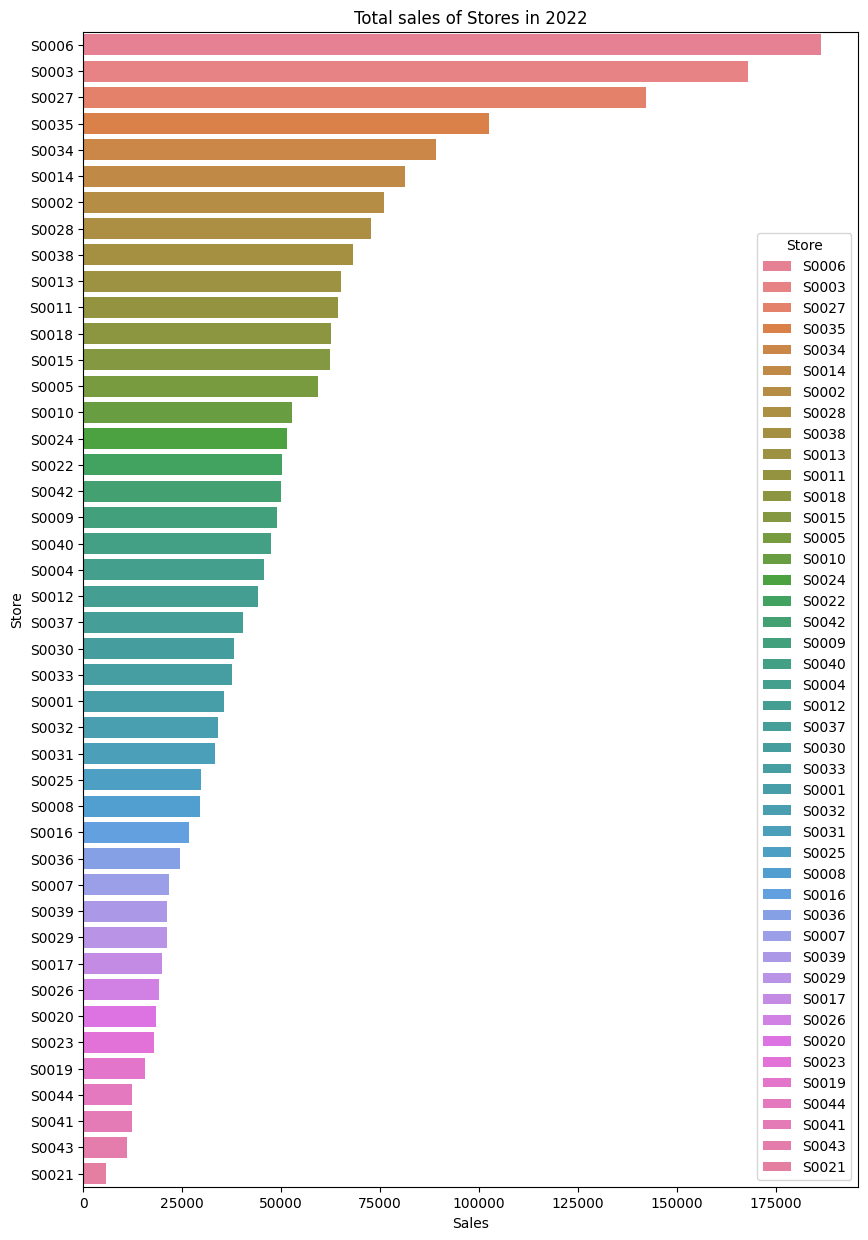

In [110]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Store'], x= df['Sales'], hue = df['Store'], legend =True)
plt.xlabel("Sales")
plt.ylabel("Store")
plt.title("Total sales of Stores in 2022")

#### What is the year wise total sales of each division?

In [111]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [112]:
cur = con.cursor()
stmt = """  
SELECT  s.division, t.year, SUM(f.total_price)
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim t on t.time_key = f.time_key
JOIN ecom_star_schema.store_dim s on s.store_key = f.store_key
GROUP BY ROLLUP(s.division, t.year)
order by SUM(f.total_price) DESC
"""
cur.execute(stmt)
records = cur.fetchall()

In [113]:
df = pd.DataFrame(records, columns = ['Division',"Year",'Sales'])
df = df.dropna()
df

,Division,Year,Sales
9,Dhaka,2016,1397046.50
10,Dhaka,2020,1176961.50
11,Dhaka,2021,1109910.00
12,Dhaka,2015,1066257.50
13,Dhaka,2019,1008441.00
...,...,...,...
76,Mymensingh,2018,112420.00
77,Mymensingh,2022,109714.00
78,Chittagong,2020,106921.00
79,Chittagong,2015,79209.00


Text(0.5, 1.0, 'Year wise Total sales of each Division')

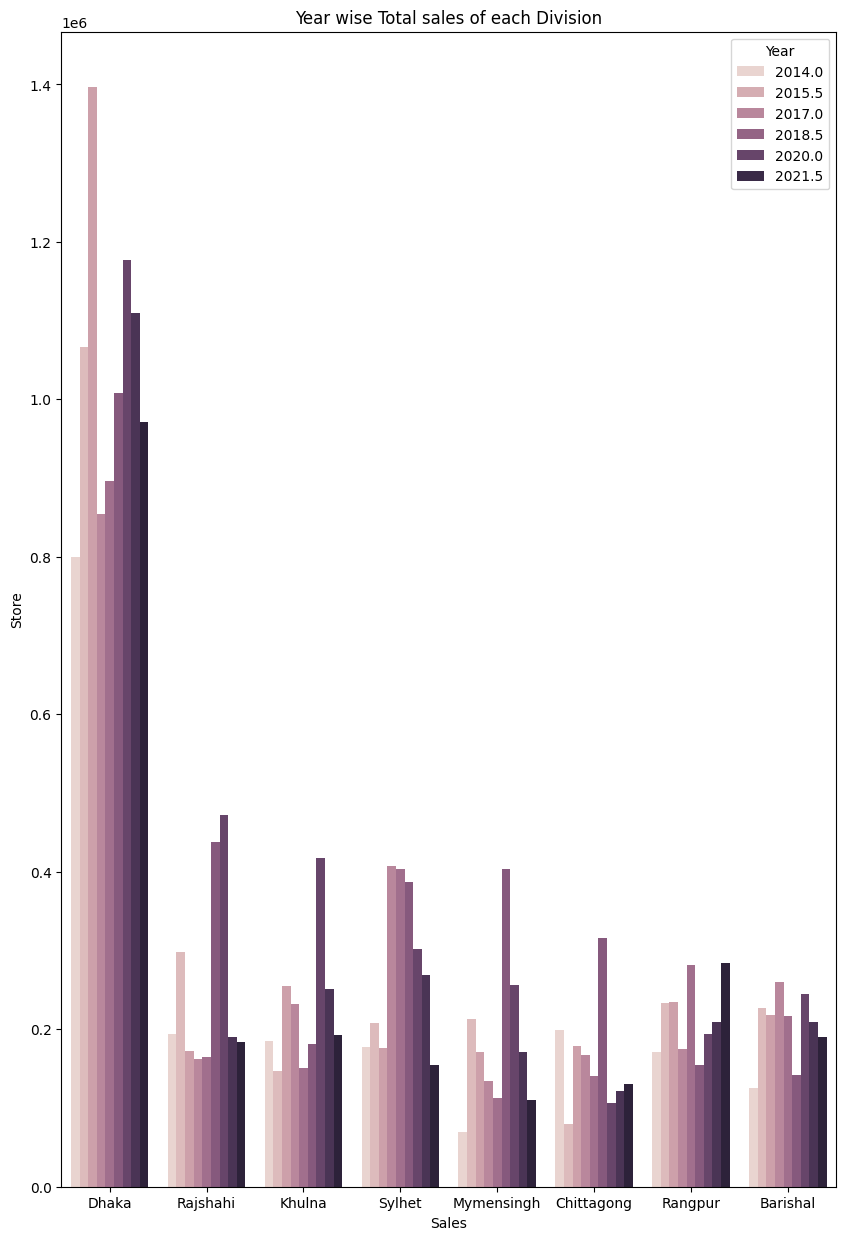

In [115]:
plt.figure(figsize=[10,15])
sns.barplot(y=df['Sales'], x= df['Division'], hue = df['Year'], legend =True)
plt.xlabel("Sales")
plt.ylabel("Store")
plt.title("Year wise Total sales of each Division")

#### 5. item and time dimensional inventory analytics.

#### Which Item has the highest inventory turnover rate in the past Quarter

In [119]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [120]:
cur = con.cursor()
stmt = """  
SELECT
    c.item_name,
    i.quarter,
    SUM(f.total_price) AS total_sales,
    AVG(f.total_price / f.quantity) AS avg_price_per_unit,
    AVG(f.quantity) AS avg_inventory,
    SUM(f.total_price) / AVG(f.quantity) AS inventory_turnover_rate
FROM
    ecom_star_schema.fact_table f
JOIN
    ecom_star_schema.time_dim i ON i.time_key = f.time_key
JOIN
    ecom_star_schema.item_dim c ON c.item_key = f.item_key
GROUP BY
    CUBE(i.quarter, c.item_name)
ORDER BY
    i.quarter, inventory_turnover_rate DESC;

"""
cur.execute(stmt)
records = cur.fetchall()

In [134]:
df = pd.DataFrame(records, columns = ['Item',"Quarter",'Total_Sales','AVG_Price_Per_Unit','AVG_Inv','Turnover_Rate'])
df = df.dropna()
df = df.head(25)
df

,Item,Quarter,Total_Sales,AVG_Price_Per_Unit,AVG_Inv,Turnover_Rate
1,K Cups Dunkin Donuts Medium Roast,Q1,46560.0,48.0000000000000000,34.6428571428571429,1343.9999999999999983
2,Monster Lo-Carb 16 oz,Q1,19760.0,40.0000000000000000,15.4375000000000000,1280.0000000000000000
3,K Cups Daily Chef Columbian Supremo,Q1,78122.0,53.0000000000000000,61.4166666666666667,1271.9999999999999993
4,Red Bull 16oz,Q1,6586.0,37.0000000000000000,5.9333333333333333,1110.0000000000000062
5,K Cups - McCafe Premium Roast,Q1,34440.0,42.0000000000000000,31.5384615384615385,1091.9999999999999987
6,K Cups Folgers Lively Columbian,Q1,39652.0,46.0000000000000000,39.1818181818181818,1012.0000000000000005
7,K Cups –Organic Breakfast Blend,Q1,41076.0,42.0000000000000000,40.7500000000000000,1008.0000000000000000
8,Muscle Milk Protein Shake Van. 11oz,Q1,5292.0,23.0476190476190476,5.4761904761904762,966.3652173913043461
9,Foam Coffee Cups - 12 ounce,Q1,418560.0,32.0000000000000000,436.0000000000000000,960.0000000000000000
10,Red Bull Sugar Free 8.4 oz,Q1,7600.0,40.0000000000000000,7.9166666666666667,959.9999999999999960


Text(0.5, 1.0, 'Inventory Turnover Rate in the past Quarter')

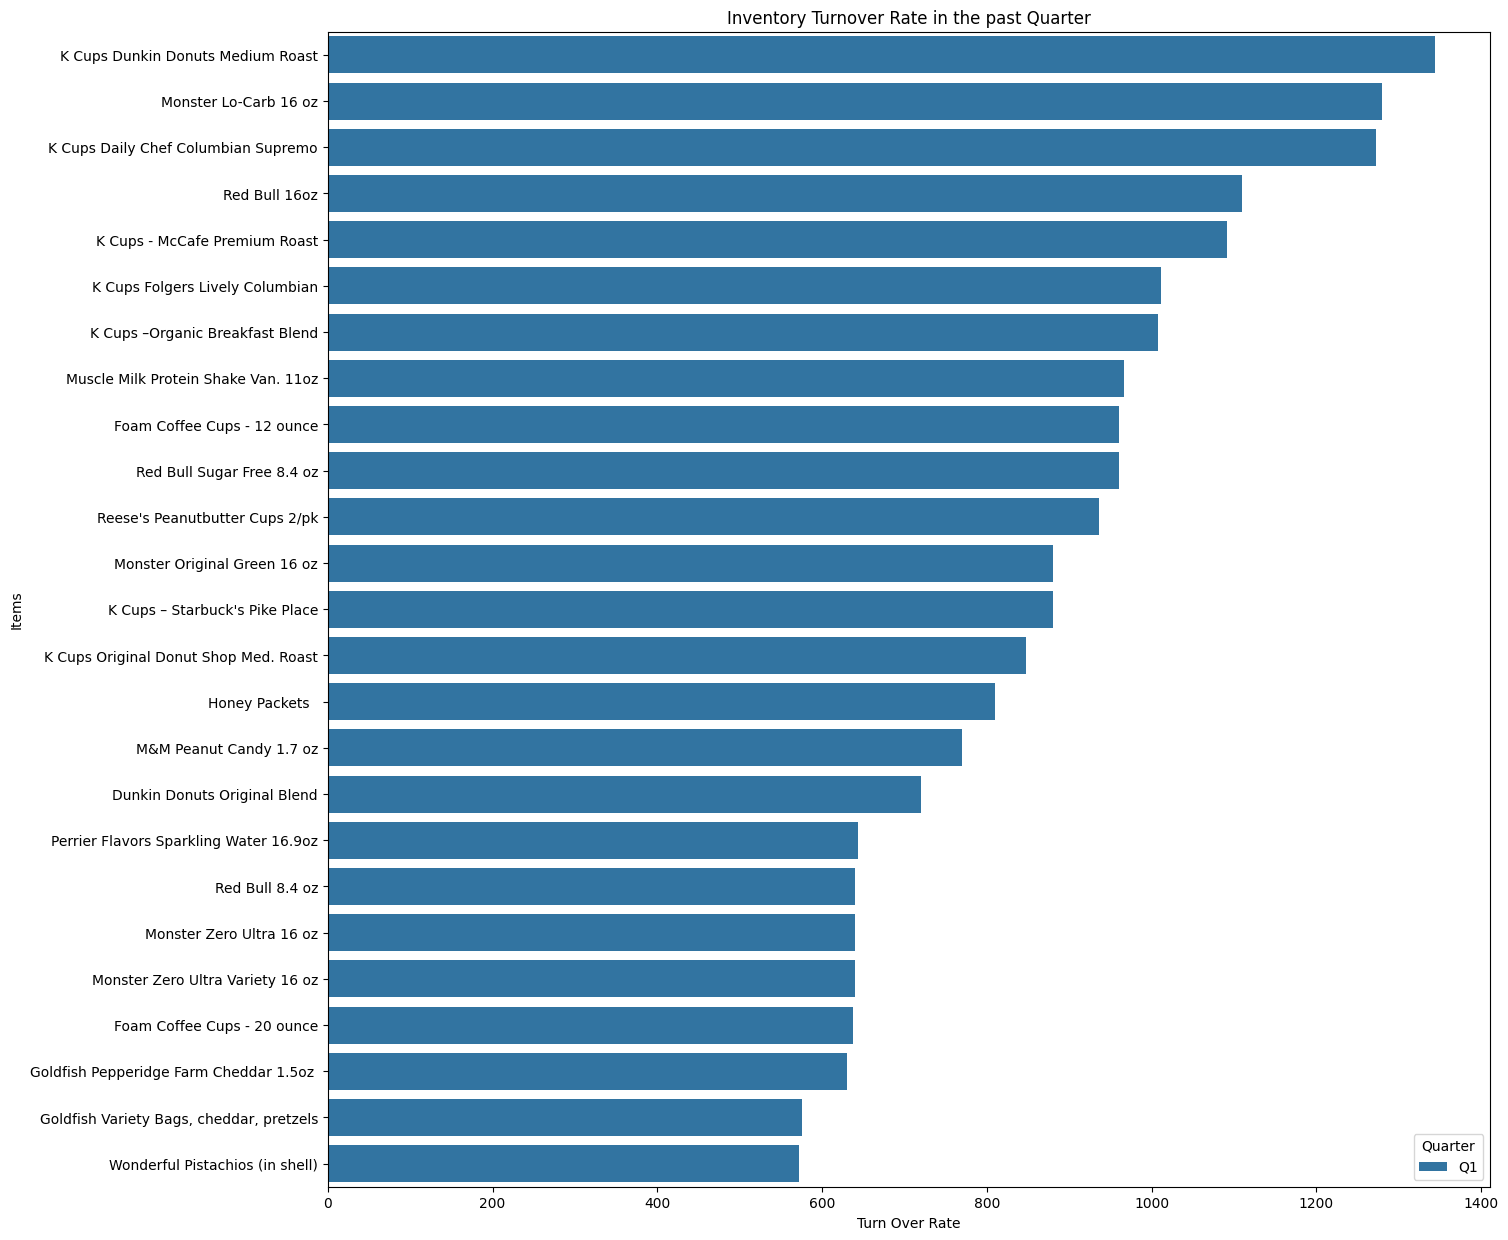

In [141]:
plt.figure(figsize=[15,15])
sns.barplot(y=df['Item'], x= df['Turnover_Rate'], hue = df['Quarter'], legend =True)
plt.xlabel("Turn Over Rate")
plt.ylabel("Items")
plt.title("Inventory Turnover Rate in the past Quarter")

#### What is the Month wise stock levels of each items in 2022?

In [156]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


In [157]:
cur = con.cursor()
stmt = """  
SELECT c.item_name, c.stock_quantity, i.month
FROM ecom_star_schema.fact_table f
JOIN ecom_star_schema.time_dim i on i.time_key = f.time_key
JOIN ecom_star_schema.item_dim c on c.item_key = f.item_key
WHERE i.year = '2022'
GROUP BY CUBE( c.item_name, c.stock_quantity, i.month )
order by  c.stock_quantity, i.month ASC
"""
cur.execute(stmt)
records = cur.fetchall()

In [170]:
df = pd.DataFrame(records, columns = ['Item','Stock','Month'])
df = df.dropna()
df = df.head(25)
df

,Item,Stock,Month
1,Clorox Bleach Large Jugs,3,1
3,Clorox Bleach Large Jugs,3,3
5,Clorox Bleach Large Jugs,3,5
7,Clorox Bleach Large Jugs,3,7
11,Lysol Disinfectant Spray 19 oz,4,1
12,Lysol Disinfectant Spray 19 oz,4,2
13,Dial Anti-bacterial Foam 7.5oz,4,2
15,Lysol Disinfectant Spray 19 oz,4,4
17,Lysol Disinfectant Spray 19 oz,4,6
20,Lysol Disinfectant Spray 19 oz,4,7


Text(0.5, 1.0, 'Month Wise Stock Levels in the Year 2022')

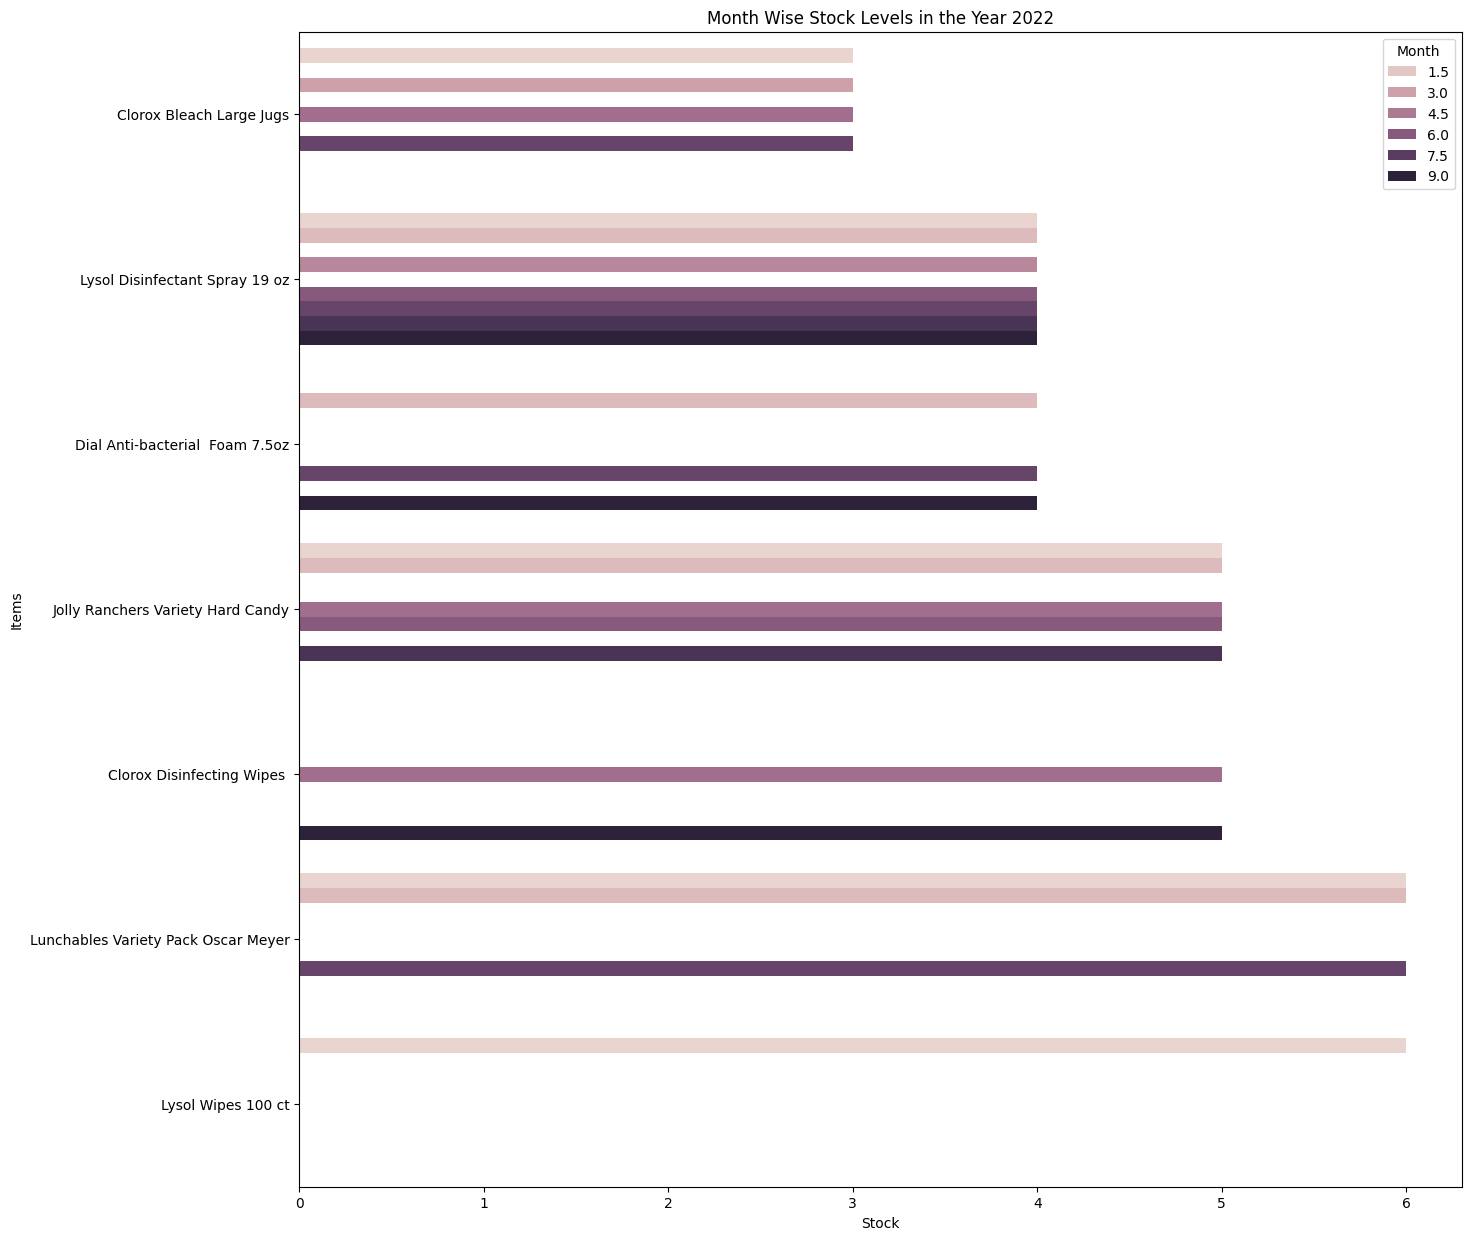

In [171]:
plt.figure(figsize=[15,15])
sns.barplot(y=df['Item'], x= df['Stock'], hue = df['Month'], legend =True)
plt.xlabel("Stock")
plt.ylabel("Items")
plt.title("Month Wise Stock Levels in the Year 2022")